# Imports

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from pint import UnitRegistry
import numpy as np

ureg = UnitRegistry()

# Constants

In [44]:
# Load the Excel file
# Replace with the actual path to your Excel file
FILEPATH = r"../data/literature_data.xlsx"
SHEETNAME = "melting"    # Replace with the actual sheet name

# Reading

In [45]:
# Read the Excel file into a DataFrame
data = pd.read_excel(FILEPATH, sheet_name=SHEETNAME,header=1)
# Display the first few rows to understand the data
# Data cleaning and preparation
data = data.drop(data.columns[0], axis=1)
# data = data.dropna()  # Drop rows with missing values
data['Temperature_Kelvin'] = pd.to_numeric(
    data['Temperature_Kelvin'], errors='coerce')
data['Pressure_atm'] = pd.to_numeric(data['Pressure_atm'], errors='coerce')
display(data)

,year,author,gas,Temperature_Kelvin,Pressure_Mpa,Pressure_atm,Pressure_bar,Pressure_kbar,Pressure_kg/cm2,Pressure_katm,Pressure_Gpa
0,1962,Michels,krypton,115.893,NaN,5.50,NaN,NaN,NaN,NaN,NaN
1,1962,Michels,krypton,116.352,NaN,20.72,NaN,NaN,NaN,NaN,NaN
2,1962,Michels,krypton,116.690,NaN,41.01,NaN,NaN,NaN,NaN,NaN
3,1962,Michels,krypton,118.198,NaN,81.56,NaN,NaN,NaN,NaN,NaN
4,1962,Michels,krypton,119.069,NaN,110.52,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
117,1971,Crawford,neon,105.253,NaN,NaN,9234.65,,NaN,NaN,NaN
118,1971,Crawford,neon,109.870,NaN,NaN,9928.11,NaN,NaN,NaN,NaN
119,1971,Crawford,neon,109.876,NaN,NaN,9929.21,NaN,NaN,NaN,NaN
120,1971,Crawford,neon,110.040,NaN,NaN,9953.55,NaN,NaN,NaN,NaN


# Functions

In [46]:
def atm_to_mpa(pressure_atm):
    """
    Convert pressure from atm to MPa using the pint library.

    Parameters:
    pressure_atm (float or pd.Series): Pressure in atm

    Returns:
    float or pd.Series: Pressure in MPa
    """
    # Define the unit
    pressure = pressure_atm * ureg.atm
    # Convert to MPa
    return pressure.to(ureg.megapascal).magnitude


def bar_to_mpa(pressure_bar):
    """
    Convert pressure from bar to MPa using the pint library.
    
    Parameters:
    pressure_bar (float or pd.Series): Pressure in bar
    
    Returns:
    float or pd.Series: Pressure in MPa
    """
    # Define the unit
    pressure = pressure_bar * ureg.bar
    # Convert to MPa
    return pressure.to(ureg.megapascal).magnitude


def plot_gas_data(data, gas_name):
    gas_data = data[data['gas'] == gas_name]
    grouped = gas_data.groupby(['year', 'author'])

    # Define markers and colors
    markers = ['o', 's', 'D', 'x', '^', '<', '>',
               '*', 'p', '+', '|', '_', '1', '2', '3', '4']
    colors = plt.cm.tab20.colors  # Using colormap for unique colors

    plt.figure(figsize=(10, 6))
    for i, ((year, author), group) in enumerate(grouped):
        plt.scatter(
            group['Temperature_Kelvin'], group['Pressure_Mpa'],
            label=f"{year}, {author}",
            s=100,  # Marker size
            color=colors[i % len(colors)],  # Marker color
            edgecolor='black',  # Black border
            marker=markers[i % len(markers)]  # Marker style
        )

    plt.xlabel('Temperature (Kelvin)', fontsize=12)
    plt.ylabel('Pressure (MPa)', fontsize=12)
    plt.title(f'Melting Temperatures for {gas_name}', fontsize=14)

    # Place the legend outside the plot
    plt.legend(
        loc='upper left',
        bbox_to_anchor=(1.05, 1),  # Position the legend outside the plot
        fontsize=8,
        ncol=1  # Adjust the number of columns in the legend
    )
    plt.grid(True, linestyle='--', alpha=0.6)
    # Adjust layout to make space for the legend
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()

# Conversions

In [47]:
# Apply the conversion function
# Convert Pressure_atm to Pressure_MPa
data['Pressure_MPa_from_atm'] = data['Pressure_atm'].apply(
    lambda x: atm_to_mpa(x) if pd.notnull(x) else None
)

# Convert Pressure_bar to Pressure_MPa
data['Pressure_MPa_from_bar'] = data['Pressure_bar'].apply(
    lambda x: bar_to_mpa(x) if pd.notnull(x) else None
)

# Combine the two converted columns into a single Pressure_MPa column (preferring atm if both exist)
data['Pressure_Mpa'] = data['Pressure_MPa_from_atm'].combine_first(
    data['Pressure_MPa_from_bar'])

# Drop intermediate columns if not needed
data = data.drop(columns=['Pressure_MPa_from_atm', 'Pressure_MPa_from_bar'])

display(data)

,year,author,gas,Temperature_Kelvin,Pressure_Mpa,Pressure_atm,Pressure_bar,Pressure_kbar,Pressure_kg/cm2,Pressure_katm,Pressure_Gpa
0,1962,Michels,krypton,115.893,0.557287,5.50,NaN,NaN,NaN,NaN,NaN
1,1962,Michels,krypton,116.352,2.099454,20.72,NaN,NaN,NaN,NaN,NaN
2,1962,Michels,krypton,116.690,4.155338,41.01,NaN,NaN,NaN,NaN,NaN
3,1962,Michels,krypton,118.198,8.264067,81.56,NaN,NaN,NaN,NaN,NaN
4,1962,Michels,krypton,119.069,11.198439,110.52,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
117,1971,Crawford,neon,105.253,923.465000,NaN,9234.65,,NaN,NaN,NaN
118,1971,Crawford,neon,109.870,992.811000,NaN,9928.11,NaN,NaN,NaN,NaN
119,1971,Crawford,neon,109.876,992.921000,NaN,9929.21,NaN,NaN,NaN,NaN
120,1971,Crawford,neon,110.040,995.355000,NaN,9953.55,NaN,NaN,NaN,NaN


In [48]:
# Filter data by gas type
krypton_data = data[data['gas'] == 'krypton']
xenon_data = data[data['gas'] == 'xenon']
neon_data = data[data['gas'] == 'neon']

# Plots

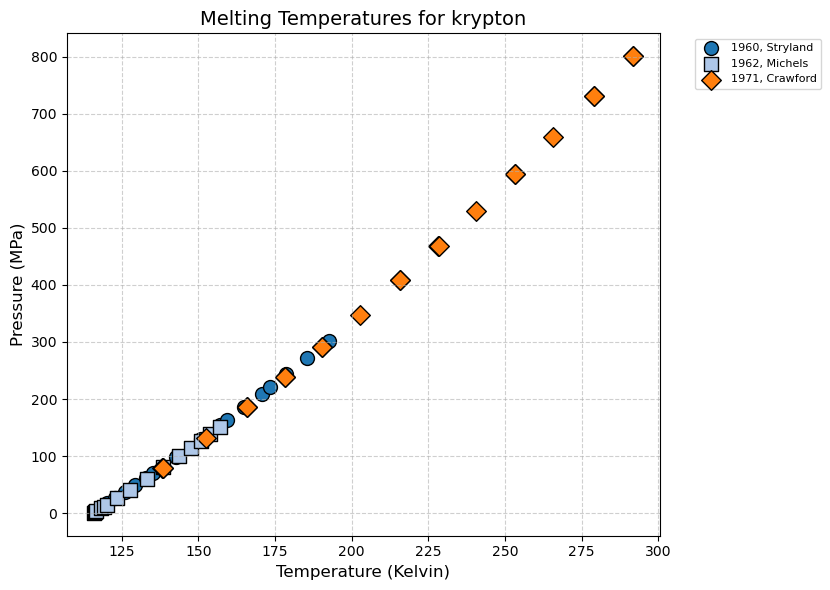

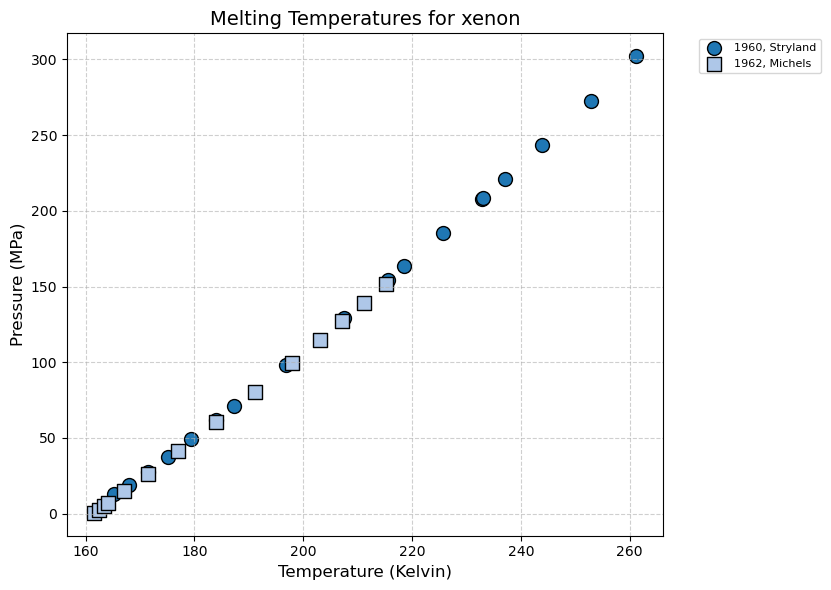

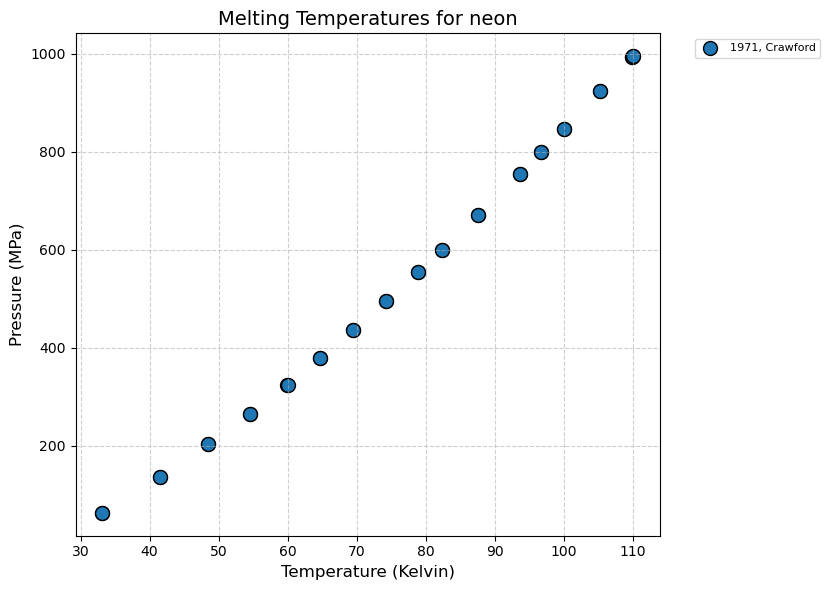

In [49]:

# Individual plots for each gas
plot_gas_data(data, 'krypton')
plot_gas_data(data, 'xenon')
plot_gas_data(data, 'neon')

In [50]:
# # Plot combined graph for all gases
# plt.figure(figsize=(10, 6))
# plt.plot(krypton_data['Temperature_Kelvin'],
#          krypton_data['Pressure_Mpa'], label='Krypton', marker='o')
# plt.plot(xenon_data['Temperature_Kelvin'],
#          xenon_data['Pressure_Mpa'], label='Xenon', marker='x')
# plt.plot(neon_data['Temperature_Kelvin'],
#          neon_data['Pressure_Mpa'], label='Neon', marker='s')
# plt.xlabel('Temperature (Kelvin)')
# plt.ylabel('Pressure (MPa)')
# plt.title('Temperature vs Pressure (MPa) for Krypton, Xenon, and Neon')
# plt.legend()
# plt.grid()
# # plt.show()